<a href="https://colab.research.google.com/github/hariomthakur73/hill-and-Valley/blob/main/Hill_and_Valley_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hill and Valley Prediction using Logistics Regression**




# **Get Understanding about Data set**

Each record represent 100 points on a two-dimensional graph. when plotted in order (from 1 through 100) as the y coordinate. the points will create  either a Hill (a "bump" in the terrain) or a valley ( a "dip" in the terrain). See the original source for some examples of these graphs.                               
**1-100**:Labeled "V##". Floating points values (numeric),the X-values.          
**101**:Labeled "class". Binary {0,1}representing {valley,hill}






# **Import Library**



In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 1000)

In [ ]:
import numpy as np
np.set_printoptions(threshold=1000)

# **Import CSV as Dataframe**

Use URL of file directly

In [ ]:
hd = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv')

# **Get the First five Row of dataframe**

In [ ]:
hd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,37.65,39.34,38.55,39.03,37.21,36.32,37.81,38.95,36.70,39.72,37.06,37.29,36.43,36.53,36.19,38.17,37.30,36.15,36.68,36.70,36.68,36.99,38.92,37.25,37.47,36.32,35.75,35.68,34.66,34.26,35.62,36.60,34.78,34.67,34.30,33.40,31.40,31.75,31.75,32.84,33.76,35.74,34.01,33.91,36.88,34.41,35.52,36.94,36.95,35.57,38.02,37.32,39.05,37.97,37.01,38.98,38.83,38.87,38.03,38.40,38.25,38.61,36.23,37.81,37.98,38.58,38.96,38.97,39.08,38.79,38.79,36.31,36.59,38.19,37.95,39.63,39.27,37.19,37.13,37.47,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,1.86,1.76,1.81,1.86,1.74,1.78,1.81,2.02,2.00,2.01,2.00,2.06,2.00,1.93,1.88,1.85,1.89,1.83,1.76,1.83,1.81,1.81,1.78,1.85,1.86,1.73,1.79,1.81,1.85,1.71,1.71,1.71,1.84,1.76,1.73,1.83,1.68,1.73,1.76,1.77,1.72,1.75,1.66,1.76,1.77,1.78,1.63,1.72,1.66,1.67,1.74,1.65,1.74,1.79,1.69,1.76,1.74,1.82,1.78,1.65,1.65,1.82,1.71,1.83,1.72,1.63,1.77,1.69,1.81,1.74,1.70,1.72,1.74,1.72,1.74,1.71,1.70,1.83,1.79,1.78,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,73417.66,67759.27,74608.57,66336.20,75236.92,70754.31,67700.92,73902.96,66161.93,71646.83,72194.27,69116.92,71612.47,74770.43,69686.94,74502.98,71904.31,70358.08,69694.61,73941.16,75446.14,75816.84,73435.10,66432.13,70823.56,68920.89,72429.82,69138.09,74919.85,75314.11,72400.71,74763.70,67268.51,67508.12,71560.35,71603.35,76256.25,72295.62,74468.56,75270.67,68124.82,70584.36,69655.63,67212.35,70308.43,66559.58,69940.83,69125.90,69415.46,69805.46,70860.60,74298.25,69924.44,75101.58,69584.85,70171.32,74564.11,75450.36,70029.97,69964.37,73687.75,72576.15,73573.75,76410.68,83257.85,76957.31,80125.79,83178.08,86976.04,91197.47,80400.37,82945.32,80513.74,78105.50,79752.76,70485.77,74493.52,74222.23,75592.31,72895.84,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,39113.55,43060.28,33587.90,32416.01,33536.08,30160.05,34261.28,30575.53,28895.52,27563.45,26946.39,35360.14,34731.21,32547.20,37601.73,43350.41,43830.86,37540.38,42492.45,41949.33,40540.92,39004.88,41387.14,38493.69,39862.56,42408.36,39649.30,41907.03,48439.05,46254.42,44949.16,40162.05,44500.79,39445.87,44434.49,46671.39,46820.18,40639.60,42577.66,42217.47,44160.92,46520.63,41933.41,40986.25,44426.07,41605.84,48896.86,44774.73,42449.71,39905.29,39907.35,45465.54,40921.92,41465.08,46174.22,41163.16,44553.21,48607.01,40804.21,45359.30,45375.30,43324.00,40089.31,43590.66,44508.23,44542.14,40139.58,43882.35,44777.21,41549.98,47769.58,46012.65,41979.51,40700.71,48893.58,40028.35,46377.96,48162.67,47866.58,39834.12,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,5.54,5.60,5.71,5.67,5.68,5.37,5.37,5.33,5.49,5.33,5.37,5.33,5.68,5.96,5.34,5.94,5.30,5.80,5.47,5.58,5.37,5.57,5.60,5.90,5.21,5.19,5.63,5.58,5.26,5.32,5.17,5.20,5.57,5.85,5.22,5.34,6.03,5.99,5.90,5.69,5.35,5.74,5.99,5.71,5.77,5.49,5.69,5.48,5.50,5.21,5.72,5.44,5.21,5.70,5.92,5.47,5.52,5.19,5.11,5.65,5.12,5.07,4.89,4.90,4.70,4.90,3.96,3.61,4.62,4.35,4.44,4.97,5.33,5.12,5.51,4.93,5.34,5.07,5.29,5.82,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


# **Get information of Dataframe**

In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


# **Get the Summary Statistics**

In [ ]:
hd.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,8194.712038,8171.441048,8122.662137,8168.233292,8221.840347,8173.955833,8190.669703,8222.709018,8114.120421,8165.581015,8169.974604,8148.723399,8189.066526,8157.494365,8192.475545,8177.455668,8175.201361,8164.161056,8158.769761,8163.800239,8132.080990,8134.434538,8129.266411,8152.298944,8164.526972,8195.220371,8150.820899,8148.174406,8171.414373,8121.182781,8096.890545,8122.405899,8128.545726,8133.317525,8144.133581,8125.893061,8165.272005,8143.554257,8138.779167,8119.155949,...,8162.194464,8167.994257,8260.250388,8217.329257,8184.663474,8231.989356,8251.574884,8264.445091,8214.122748,8217.761304,8227.375875,8227.321716,8189.491031,8230.173383,8205.115545,8196.334975,8235.895817,8230.888746,8183.075446,8214.853581,8233.505776,8199.860734,8269.849257,8315.012442,8221.200734,8255.866337,8235.942145,8227.696007,8175.783845,8189.425470,8167.536848,8115.743845,8089.071015,8139.274554,8112.090792,8162.824125,8114.968053,8174.165050,8097.522343,8115.970322,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,18117.194272,17992.558699,17978.712057,18161.653002,18220.516698,18057.209863,18057.390094,18218.916243,17853.244994,18006.696685,18158.568375,17942.807128,18092.026608,17978.546229,18040.048515,18034.871225,18073.523180,17981.013608,17880.667921,17941.842422,17801.635674,17812.266803,17802.283796,17840.073037,17849.454543,18135.619437,17926.056315,17959.990341,18025.923666,17823.338607,17773.059437,17946.694750,17875.725550,17887.082054,17910.582021,17866.398421,17968.253260,18049.584440,17888.041708,17784.919151,...,17915.803796,17927.139816,18231.477893,18033.402207,17923.082885,18137.915002,18117.288033,18318.103171,18075.297408,18110.996605,18231.147449,18157.803347,18024.707695,18214.133283,18110.696826,18065.241204,18185.060234,18283.063427,18128.341111,18166.752088,18285.978228,18254.172724,18416.028368,18604.507330,18246.084422,18299.872381,18301.063642,18190.487637,17975.321067,18044.417679,17993.978504,17815.562061,17668.983864,17911.006248,17718.609853,17847.530290,17756.774020,17821.862298,17690.952746,17689.419087,17773.1

In [ ]:
hd.shape

(1212, 101)

In [ ]:
hd.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

# **Get unique value (Class or Label) in y variable**

In [ ]:
hd['Class'].value_counts()

Class
0    606
1    606
Name: count, dtype: int64

In [ ]:
hd.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,7722.528581,7685.541650,7598.824026,7636.695363,7621.944059,7633.463003,7697.008614,7634.785578,7581.690413,7618.053515,7674.474010,7680.944290,7672.482838,7619.469835,7667.887673,7621.718515,7645.139290,7669.187838,7597.340446,7682.560594,7566.45896,7577.911469,7566.749373,7632.003564,7582.309934,7587.519703,7523.619884,7552.900743,7561.582393,7514.653878,7461.915974,7515.596172,7524.576634,7517.704208,7563.282393,7549.538251,7584.68703,7611.729703,7565.484736,7503.225215,7586.746089,7616.057574,7568.734109,7649.701337,7616.640231,7551.940066,7675.299274,7638.908993,7712.420858,7599.906436,7647.784191,7601.90170,7624.512822,7597.547657,7693.892096,7617.575759,7647.067838,7660.526782,7679.037030,7594.034785,7610.674455,7604.852343,7540.352195,7626.782475,7678.048069,7575.361634,7667.690891,7618.682772,7616.564406,7572.097492,7606.819307,7551.094010,7561.841815,7542.109224,7570.135116,7568.555792,7656.355000,7685.046865,7730.797591,7697.706172,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,8666.895495,8657.340446,8646.500248,8699.771221,8821.736634,8714.448663,8684.330792,8810.632459,8646.550429,8713.108515,8665.475198,8616.502508,8705.650215,8695.518894,8717.063416,8733.192822,8705.263432,8659.134274,8720.199076,8645.039884,8697.70302,8690.957607,8691.783449,8672.594323,8746.744010,8802.921040,8778.021914,8743.448069,8781.246353,8727.711683,8731.865116,8729.215627,8732.514818,8748.930842,8724.984769,8702.247871,8745.85698,8675.378812,8712.073597,8735.086683,8718.358894,8708.331353,8767.254406,8870.799439,8818.018284,8817.386881,8788.679439,8864.240776,8816.469323,8828.339059,8787.738416,8852.85005,8830.130611,8781.434406,8766.454670,8792.655330,8745.602112,8811.264851,8782.740462,8772.116106,8819.032706,8862.159208,8859.369274,8912.916040,8951.976815,8867.039835,8844.041782,8853.201518,8838.827607,8779.470198,8772.031634,8783.979686,8669.645875,8636.032805,8708.413993,8655.625792,8669.293251,8544.889241,8617.532508,8497.338515,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


# **Define y (dependent or label or target variable) and X (independent or features or attribute variable)**

In [ ]:
y = hd['Class']

In [ ]:
y.shape

(1212,)

In [ ]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1207    1
1208    0
1209    1
1210    1
1211    0
Name: Class, Length: 1212, dtype: int64

In [ ]:
X = hd[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30','V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60','V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80' , 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91','V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',]]

or use .drop function to define X

In [ ]:
X = hd.drop(['Class'], axis=1)

In [ ]:
X.shape

(1212, 100)

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,37.65,39.34,38.55,39.03,37.21,36.32,37.81,38.95,36.70,39.72,37.06,37.29,36.43,36.53,36.19,38.17,37.30,36.15,36.68,36.70,36.68,36.99,38.92,37.25,37.47,36.32,35.75,35.68,34.66,34.26,35.62,36.60,34.78,34.67,34.30,33.40,31.40,31.75,31.75,32.84,33.76,35.74,34.01,33.91,36.88,34.41,35.52,36.94,36.95,35.57,38.02,37.32,39.05,37.97,37.01,38.98,38.83,38.87,38.03,38.40,38.25,38.61,36.23,37.81,37.98,38.58,38.96,38.97,39.08,38.79,38.79,36.31,36.59,38.19,37.95,39.63,39.27,37.19,37.13,37.47,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,1.86,1.76,1.81,1.86,1.74,1.78,1.81,2.02,2.00,2.01,2.00,2.06,2.00,1.93,1.88,1.85,1.89,1.83,1.76,1.83,1.81,1.81,1.78,1.85,1.86,1.73,1.79,1.81,1.85,1.71,1.71,1.71,1.84,1.76,1.73,1.83,1.68,1.73,1.76,1.77,1.72,1.75,1.66,1.76,1.77,1.78,1.63,1.72,1.66,1.67,1.74,1.65,1.74,1.79,1.69,1.76,1.74,1.82,1.78,1.65,1.65,1.82,1.71,1.83,1.72,1.63,1.77,1.69,1.81,1.74,1.70,1.72,1.74,1.72,1.74,1.71,1.70,1.83,1.79,1.78,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,73417.66,67759.27,74608.57,66336.20,75236.92,70754.31,67700.92,73902.96,66161.93,71646.83,72194.27,69116.92,71612.47,74770.43,69686.94,74502.98,71904.31,70358.08,69694.61,73941.16,75446.14,75816.84,73435.10,66432.13,70823.56,68920.89,72429.82,69138.09,74919.85,75314.11,72400.71,74763.70,67268.51,67508.12,71560.35,71603.35,76256.25,72295.62,74468.56,75270.67,68124.82,70584.36,69655.63,67212.35,70308.43,66559.58,69940.83,69125.90,69415.46,69805.46,70860.60,74298.25,69924.44,75101.58,69584.85,70171.32,74564.11,75450.36,70029.97,69964.37,73687.75,72576.15,73573.75,76410.68,83257.85,76957.31,80125.79,83178.08,86976.04,91197.47,80400.37,82945.32,80513.74,78105.50,79752.76,70485.77,74493.52,74222.23,75592.31,72895.84,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,39113.55,43060.28,33587.90,32416.01,33536.08,30160.05,34261.28,30575.53,28895.52,27563.45,26946.39,35360.14,34731.21,32547.20,37601.73,43350.41,43830.86,37540.38,42492.45,41949.33,40540.92,39004.88,41387.14,38493.69,39862.56,42408.36,39649.30,41907.03,48439.05,46254.42,44949.16,40162.05,44500.79,39445.87,44434.49,46671.39,46820.18,40639.60,42577.66,42217.47,44160.92,46520.63,41933.41,40986.25,44426.07,41605.84,48896.86,44774.73,42449.71,39905.29,39907.35,45465.54,40921.92,41465.08,46174.22,41163.16,44553.21,48607.01,40804.21,45359.30,45375.30,43324.00,40089.31,43590.66,44508.23,44542.14,40139.58,43882.35,44777.21,41549.98,47769.58,46012.65,41979.51,40700.71,48893.58,40028.35,46377.96,48162.67,47866.58,39834.12,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,5.54,5.60,5.71,5.67,5.68,5.37,5.37,5.33,5.49,5.33,5.37,5.33,5.68,5.96,5.34,5.94,5.30,5.80,5.47,5.58,5.37,5.57,5.60,5.90,5.21,5.19,5.63,5.58,5.26,5.32,5.17,5.20,5.57,5.85,5.22,5.34,6.03,5.99,5.90,5.69,5.35,5.74,5.99,5.71,5.77,5.49,5.69,5.48,5.50,5.21,5.72,5.44,5.21,5.70,5.92,5.47,5.52,5.19,5.11,5.65,5.12,5.07,4.89,4.90,4.70,4.90,3.96,3.61,4.62,4.35,4.44,4.97,5.33,5.12,5.51,4.93,5.34,5.07,5.29,5.82,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# **Get Plot of First Two Rows**

In [ ]:
import matplotlib.pyplot as plt


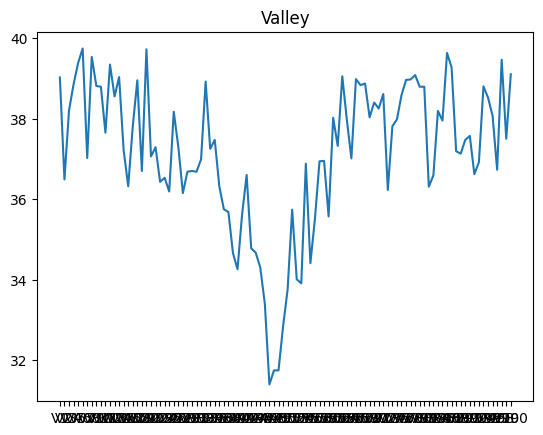

In [ ]:
plt.plot(X.iloc[0,:])
plt.title('Valley');

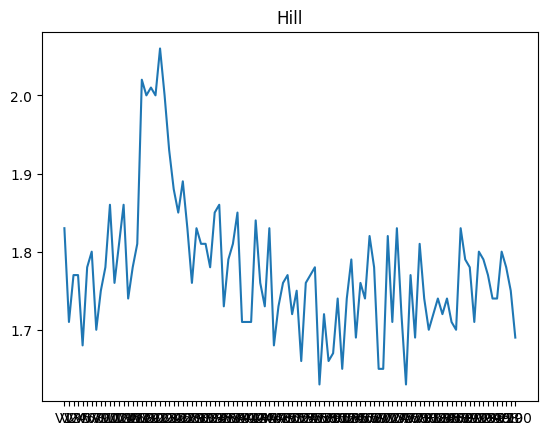

In [ ]:
plt.plot(X.iloc[1,:])
plt.title('Hill');

# **Get X Variables Standardized**

Standardization is a method of feature scaling in which data values are rescaled to fit the distribution between 0 and 1 using mean and standard deviation as the base to find specific values. The distance between data points is then used for plotting similarities and differences.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X = ss.fit_transform(X)

In [ ]:
X

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [ ]:
X.shape

(1212, 100)

# **Get Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((848, 100), (364, 100), (848,), (364,))

# **Get Model Train**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

# **Get Model Prediction**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(364,)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

# **Get Probability of Each Predicted Class**

In [ ]:
lr.predict_proba(X_test)

array([[0.56336744, 0.43663256],
       [0.50327039, 0.49672961],
       [0.57446514, 0.42553486],
       [0.50737525, 0.49262475],
       [0.50767478, 0.49232522],
       [0.5087066 , 0.4912934 ],
       [0.50793217, 0.49206783],
       [0.60357917, 0.39642083],
       [0.51009655, 0.48990345],
       [0.50964836, 0.49035164],
       [0.50721213, 0.49278787],
       [0.51503419, 0.48496581],
       [0.93595857, 0.06404143],
       [0.50968822, 0.49031178],
       [0.52004959, 0.47995041],
       [0.73731198, 0.26268802],
       [0.47389171, 0.52610829],
       [0.50781847, 0.49218153],
       [0.50862145, 0.49137855],
       [0.5086342 , 0.4913658 ],
       [0.29771935, 0.70228065],
       [0.38273299, 0.61726701],
       [0.50865396, 0.49134604],
       [0.28367974, 0.71632026],
       [0.50873182, 0.49126818],
       [0.50707761, 0.49292239],
       [0.50896136, 0.49103864],
       [0.50811697, 0.49188303],
       [0.50861558, 0.49138442],
       [0.5074842 , 0.4925158 ],
       [0.

# **Get Model Evalution**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[181   1]
 [106  76]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       182
           1       0.99      0.42      0.59       182

    accuracy                           0.71       364
   macro avg       0.81      0.71      0.68       364
weighted avg       0.81      0.71      0.68       364



# **Get future Pedictions**

**Lets select a random sample from existing dataset as new value**

steps to follow

  1.Extract a random row using sample function                                  
  2.Seprate X and y                                                              
  3.StandardizeX                                                                
  4.Predict    

In [ ]:
X_new = hd.sample(1)

In [ ]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
998,32568.4,32247.97,31775.96,32469.39,31102.88,33548.49,32121.18,32628.62,31531.33,31961.32,32310.33,34154.19,33508.3,36727.15,36259.54,37676.71,36861.9,33908.38,35920.43,33834.51,33058.09,31879.73,32802.38,31326.75,31868.42,33544.77,33172.99,32373.56,30771.53,31701.96,31129.04,32441.87,31025.89,33121.4,32427.14,30564.32,33113.49,31317.05,31493.94,30986.48,30831.12,33268.28,32363.28,31421.72,32403.94,31551.08,31535.39,30311.45,31080.38,30161.43,31405.48,30428.39,32295.34,31411.0,30985.94,32170.79,31673.84,32162.1,32488.28,32650.19,32944.19,32901.12,32467.84,30305.0,30749.7,33128.38,31943.2,31870.04,33204.96,30664.57,30804.03,30679.29,30889.33,30837.41,31464.34,30820.79,32177.76,30965.58,32294.4,31488.2,32125.04,32699.24,32828.74,33171.57,31106.56,31135.28,30815.07,32626.08,32450.81,31906.57,31899.23,32856.51,33244.44,31408.76,31890.09,33059.21,33232.72,32837.27,33049.78,32006.82,1


In [ ]:
X_new.shape

(1, 101)

In [ ]:
X_new = X_new.drop('Class', axis=1)

In [ ]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
998,32568.4,32247.97,31775.96,32469.39,31102.88,33548.49,32121.18,32628.62,31531.33,31961.32,32310.33,34154.19,33508.3,36727.15,36259.54,37676.71,36861.9,33908.38,35920.43,33834.51,33058.09,31879.73,32802.38,31326.75,31868.42,33544.77,33172.99,32373.56,30771.53,31701.96,31129.04,32441.87,31025.89,33121.4,32427.14,30564.32,33113.49,31317.05,31493.94,30986.48,30831.12,33268.28,32363.28,31421.72,32403.94,31551.08,31535.39,30311.45,31080.38,30161.43,31405.48,30428.39,32295.34,31411.0,30985.94,32170.79,31673.84,32162.1,32488.28,32650.19,32944.19,32901.12,32467.84,30305.0,30749.7,33128.38,31943.2,31870.04,33204.96,30664.57,30804.03,30679.29,30889.33,30837.41,31464.34,30820.79,32177.76,30965.58,32294.4,31488.2,32125.04,32699.24,32828.74,33171.57,31106.56,31135.28,30815.07,32626.08,32450.81,31906.57,31899.23,32856.51,33244.44,31408.76,31890.09,33059.21,33232.72,32837.27,33049.78,32006.82


In [ ]:
X_new = ss.fit_transform(X_new)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([1])

In [ ]:
lr.predict_proba(X_new)

array([[0.49714993, 0.50285007]])